In [52]:
### NOTES ###
# MESA is an absolute nightmare.

# This notebook does the following:
#     Extracts and reads in all history.data files if the LOG folders are placed in the appropriate directory
#     Creates HR plots, both line and scatter, from history.data files
#     Plots radius vs. time from history.data files
#     Finds and returns the model number for which the radius is at its maximum

# If the quotation mark error is fixed or the version of MESA is updated, that piece of code may need to be
# changed. Search "s.replace".

# Logs from the LOGS_finish and LOGS folders are commented out. Search "hFExists:" to find them.

In [1]:
# import the stuff needed
import mesa_reader as mr
from math import log
import matplotlib.pylab as plt
import numpy as np
from heapq import nlargest

# define the temperature limits here
maxTemp = 4.6
minTemp = 3.4

In [2]:
# bringing in the data
import os

filenames = []

# find all the files in the directory called "history.data"
workingDirectory = '/Users/emilyflynn/Desktop/1.0M_Sun'

for root, dirs, files in os.walk(workingDirectory):
    for file in files:
        if file.endswith("history.data"):
            filenames.append(os.path.join(root, file))

# for each file, go in and correct that quotation mark error
# replace 10.14-2019 with 10.14-2019"
for file in filenames:
    s = open(file).read()
    s = s.replace('10.14-2019 ', '10.14-2019"')
    f = open(file, 'w')
    f.write(s)
    f.close()

# for each file, read it into a variable based on which log folder it's in
hBRExists = False
hARExists, hRExists = False, False
htSBExists, htlgTExists = False, False
hCExists, hFExists, hLExists = False, False, False

for file in filenames:
    if 'before_remove' in file:
        hBR = mr.MesaData(file)
        hBRExists = True
        
    elif 'after_remove' in file:
        hAR = mr.MesaData(file)
        hARExists = True
        
    elif 'remove' in file:
        hR = mr.MesaData(file)
        hRExists = True
        
    elif 'to_si_burn' in file:
        htSB = mr.MesaData(file)
        htSBExists = True
        
    elif 'to_lgT_9.9' in file:
        htlgT = mr.MesaData(file)
        hlgTExists = True
        
    elif 'convert' in file:
        hC = mr.MesaData(file)
        hCExists = True
        
    elif 'finish' in file:
        hF = mr.MesaData(file)
        hFExists = True
        
    else:
        hL = mr.MesaData(file)
        hLExists = True

In [3]:
# frankenstein the data together because MESA is MESA

hModels = []
hLum = []
hAge = []
hTemp = []
hRadius = []
hMass = []

if hBRExists:
    hLum.append(hBR.log_L)
    hTemp.append(hBR.log_Teff)
    hAge.append(hBR.star_age)
    hRadius.append(hBR.log_R)
    hModels.append(hBR.model_number)
    hMass.append(hBR.star_mass)

if hRExists:
    hLum.append(hR.log_L)
    hTemp.append(hR.log_Teff)
    hAge.append(hR.star_age)
    hRadius.append(hR.log_R)
    hModels.append(hR.model_number)
    hMass.append(hR.star_mass)

if hARExists:
    hLum.append(hAR.log_L)
    hTemp.append(hAR.log_Teff)
    hAge.append(hAR.star_age)
    hRadius.append(hAR.log_R)
    hModels.append(hAR.model_number)
    hMass.append(hAR.star_mass)

if htSBExists:
    hLum.append(htSB.log_L)
    hTemp.append(htSB.log_Teff)
    hAge.append(htSB.star_age)
    hRadius.append(htSB.log_R)
    hModels.append(htSB.model_number)
    hMass.append(htSB.star_mass)

if htlgTExists:
    hLum.append(htlgT.log_L)
    hTemp.append(htlgT.log_Teff)
    hAge.append(htlgT.star_age)
    hRadius.append(htlgT.log_R)
    hModels.append(htlgT.model_number)
    hMass.append(htlgT.star_mass)

if hCExists:
    hLum.append(hC.log_L)
    hTemp.append(hC.log_Teff)
    hAge.append(hC.star_age)
    hRadius.append(hC.log_R)
    hModels.append(hC.model_number)
    hMass.append(hC.star_mass)

# these are behaving weirdly
# if hFExists:
#     hLum.append(hF.log_L)
#     hTemp.append(hF.log_Teff)
#     hAge.append(hF.star_age)
#     hRadius.append(hF.log_R)
#     hModels.append(hF.model_number)

if hLExists:
    hLum.append(hL.log_L)
    hTemp.append(hL.log_Teff)
    hAge.append(hL.star_age)
    hRadius.append(hL.log_R)
    hModels.append(hL.model_number)
    hMass.append(hL.star_mass)

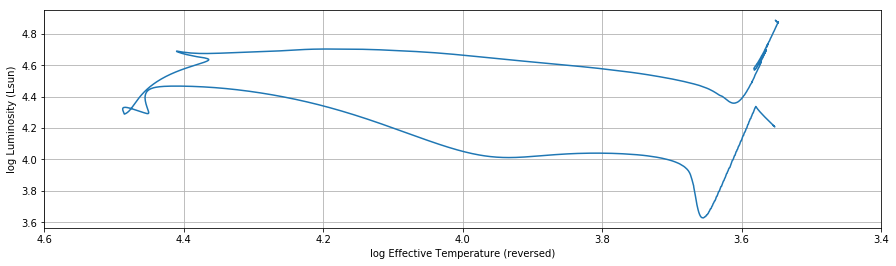

In [17]:
# make a HR diagram - plot
fig, ax = plt.subplots(figsize=(15,4))

for x in range(len(hLum)):
    plt.plot(hTemp[x], hLum[x])

plt.xlabel('log Effective Temperature (reversed)')
plt.ylabel('log Luminosity (Lsun)')
plt.grid(axis='both')
plt.xlim(maxTemp, minTemp)

plt.show()

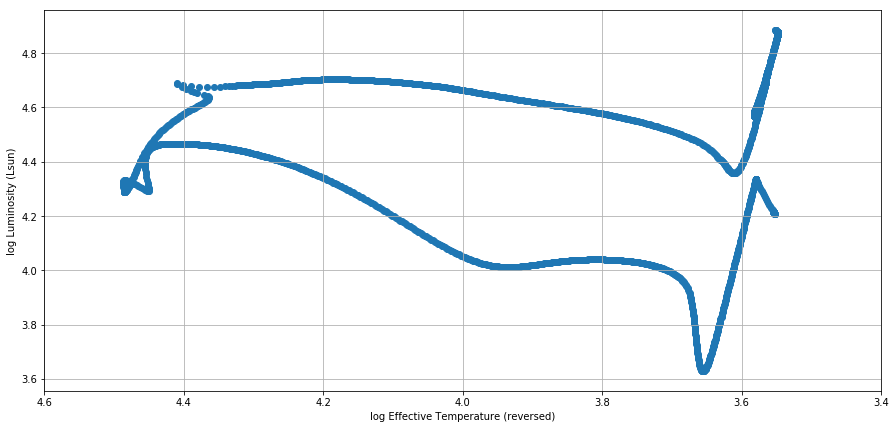

In [13]:
# make a HR diagram - scatter
fig, ax = plt.subplots(figsize=(15,7))

for x in range(len(hLum)):
    plt.scatter(hTemp[x], hLum[x])
    
plt.xlabel('log Effective Temperature (reversed)')
plt.ylabel('log Luminosity (Lsun)')
plt.grid(axis='both')
plt.xlim(maxTemp, minTemp)
plt.show()

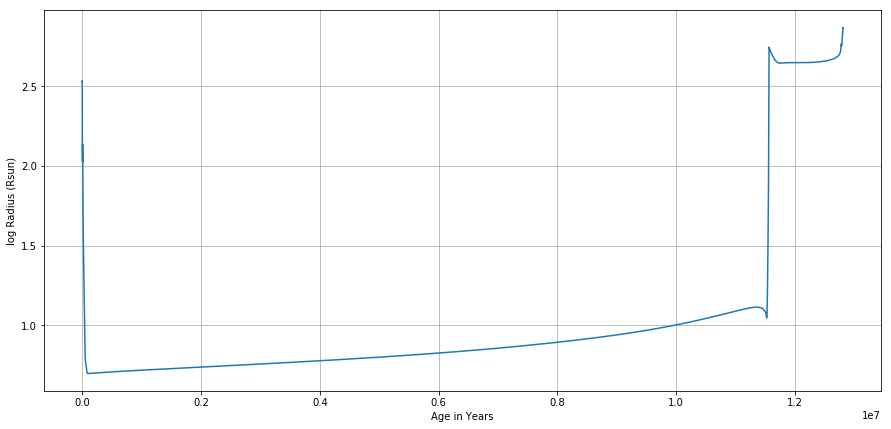

In [18]:
# plot the radius over time
fig, ax = plt.subplots(figsize=(15,7))

for x in range(len(hAge)):
    plt.plot(hAge[x], hRadius[x])
    
plt.xlabel('Age in Years')
plt.ylabel('log Radius (Rsun)')
plt.grid(axis='both')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

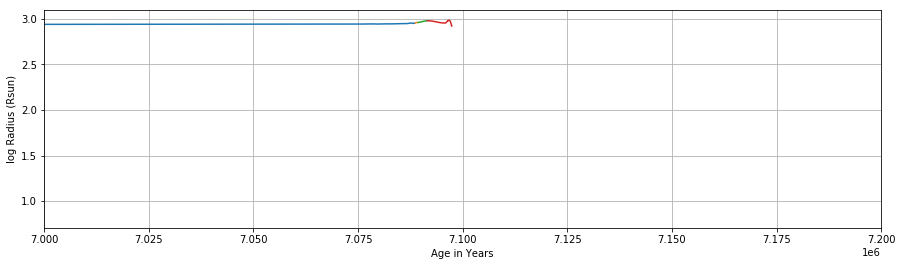

In [9]:
# zoom in on the weird stuff
fig, ax = plt.subplots(figsize=(15,4))

for x in range(len(hAge)):
    plt.plot(hAge[x], hRadius[x])
    
plt.xlabel('Age in Years')
plt.ylabel('log Radius (Rsun)')
plt.grid(axis='both')

# limits need heavy modification depending on dataset
plt.xlim(7e6, 7.2e6)
# plt.ylim(2.2, 2.23)
# plt.plot(394, 2.9851580830707496, 'r*')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [4]:
# find the model number for when the radius is at its maximum
maxValues = []
maxModelNumbers = []

# find the biggest 5 in each history file
for x in range(len(hRadius)):
    data = hRadius[x]
    maxValues.append(nlargest(1, data))
    index = nlargest(1, range(len(data)), key=lambda idx: data[idx])
    maxModelNumbers.append(hModels[x][index])

print(maxValues)
print(maxModelNumbers)
print('-----')
print(max(maxValues))
print(maxModelNumbers[np.argmax(maxValues)])

[[3.0274879200465348], [3.0254979131274795], [3.0214272785938334], [2.9663907771571107], [2.8907767330507257], [2.769246611634912]]
[array([294]), array([321]), array([324]), array([333]), array([1103]), array([54])]
-----
[3.0274879200465348]
[294]


(0.995, 1.005)

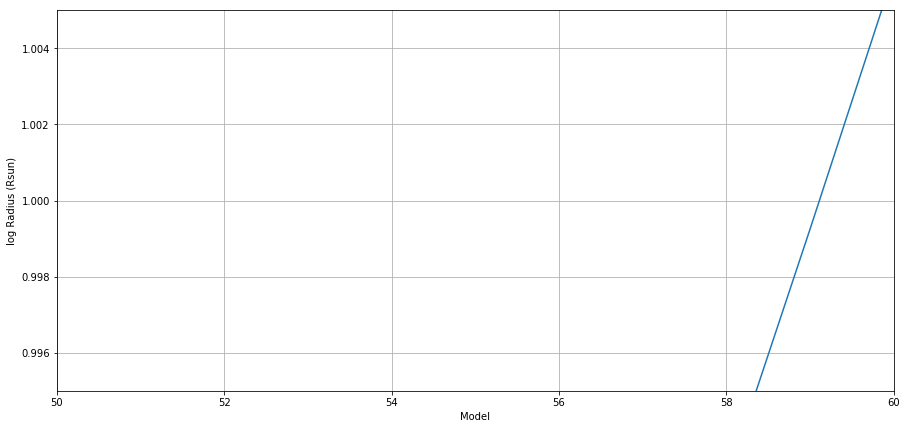

In [43]:
fig, ax = plt.subplots(figsize=(15,7))

for x in range(len(hAge)):
    plt.plot(hModels[x], hRadius[x])
    
plt.xlabel('Model')
plt.ylabel('log Radius (Rsun)')
plt.grid(axis='both')
plt.xlim(50, 60)
plt.ylim(0.995, 1.005)